In [1]:
import numpy as np
import pandas as pd
import sys, os, time
import pickle
import math
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
def read_log(n):
    return pd.read_csv('./log/'+n+'_log.txt',names=["p1", "p2", "p3","p4", "p5", "cost",'area','hpwl'])

In [16]:
ami33 = read_log('ami33')
ami49 = read_log('ami49')
apte = read_log('apte')
hp = read_log('hp')
xerox = read_log('xerox')

In [17]:
#hpwl correction
ami33.hpwl /= 2
ami49.hpwl /= 2
apte.hpwl /= 2
hp.hpwl /= 2
xerox.hpwl /= 2

In [18]:
ami33.head()

,p1,p2,p3,p4,p5,cost,area,hpwl
0,0.742500,0.500000,0.125000,10.0,3.000000,715624.00,1297912.0,66668.00
1,0.613137,0.631325,0.036598,8.0,2.773757,688882.25,1253616.0,62074.25
2,0.742500,0.500000,0.125000,10.0,3.000000,698902.75,1273608.0,62098.75
3,0.613137,0.631325,0.036598,8.0,2.773757,713328.00,1298745.0,63955.50
4,0.565493,0.534250,0.150569,10.0,4.141771,713193.25,1291150.0,67618.25


In [19]:
ami33min = ami33[ami33.hpwl == ami33.hpwl.min()].iloc[0]
ami49min = ami49[ami49.hpwl == ami49.hpwl.min()].iloc[0]
aptemin = apte[apte.hpwl == apte.hpwl.min()].iloc[0]
hpmin = hp[hp.hpwl == hp.hpwl.min()].iloc[0]
xeroxmin =xerox[xerox.hpwl == xerox.hpwl.min()].iloc[0]

Text(0.5, 1.0, 'ami49')

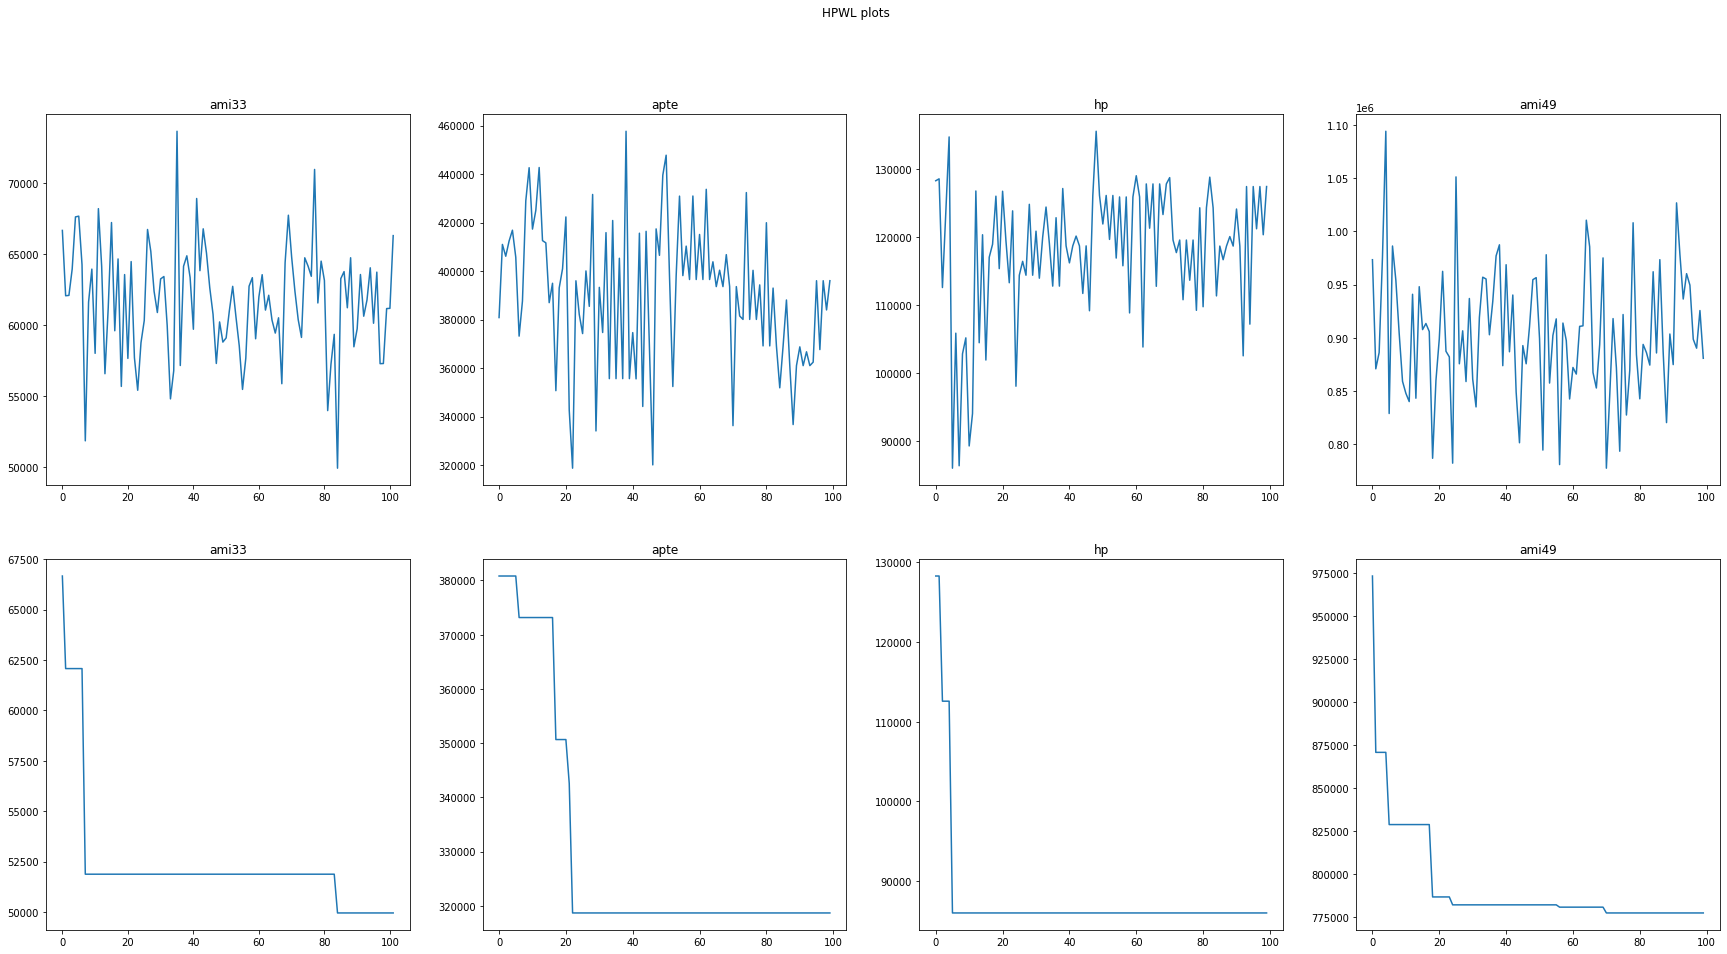

In [21]:
fig = plt.figure(figsize=(30, 15))
fig.suptitle('HPWL plots')
a=fig.add_subplot(2,4,1)
surf1 = a.plot(ami33['hpwl'])
a.set_title('ami33')
a=fig.add_subplot(2,4,2)
surf1 = a.plot(apte['hpwl'])
a.set_title('apte')
a=fig.add_subplot(2,4,3)
surf1 = a.plot(hp['hpwl'])
a.set_title('hp')
a=fig.add_subplot(2,4,4)
surf1 = a.plot(ami49['hpwl'])
a.set_title('ami49')

a=fig.add_subplot(2,4,5)
surf1 = a.plot(ami33['hpwl'].cummin())
a.set_title('ami33')
a=fig.add_subplot(2,4,6)
surf1 = a.plot(apte['hpwl'].cummin())
a.set_title('apte')
a=fig.add_subplot(2,4,7)
surf1 = a.plot(hp['hpwl'].cummin())
a.set_title('hp')
a=fig.add_subplot(2,4,8)
surf1 = a.plot(ami49['hpwl'].cummin())
a.set_title('ami49')

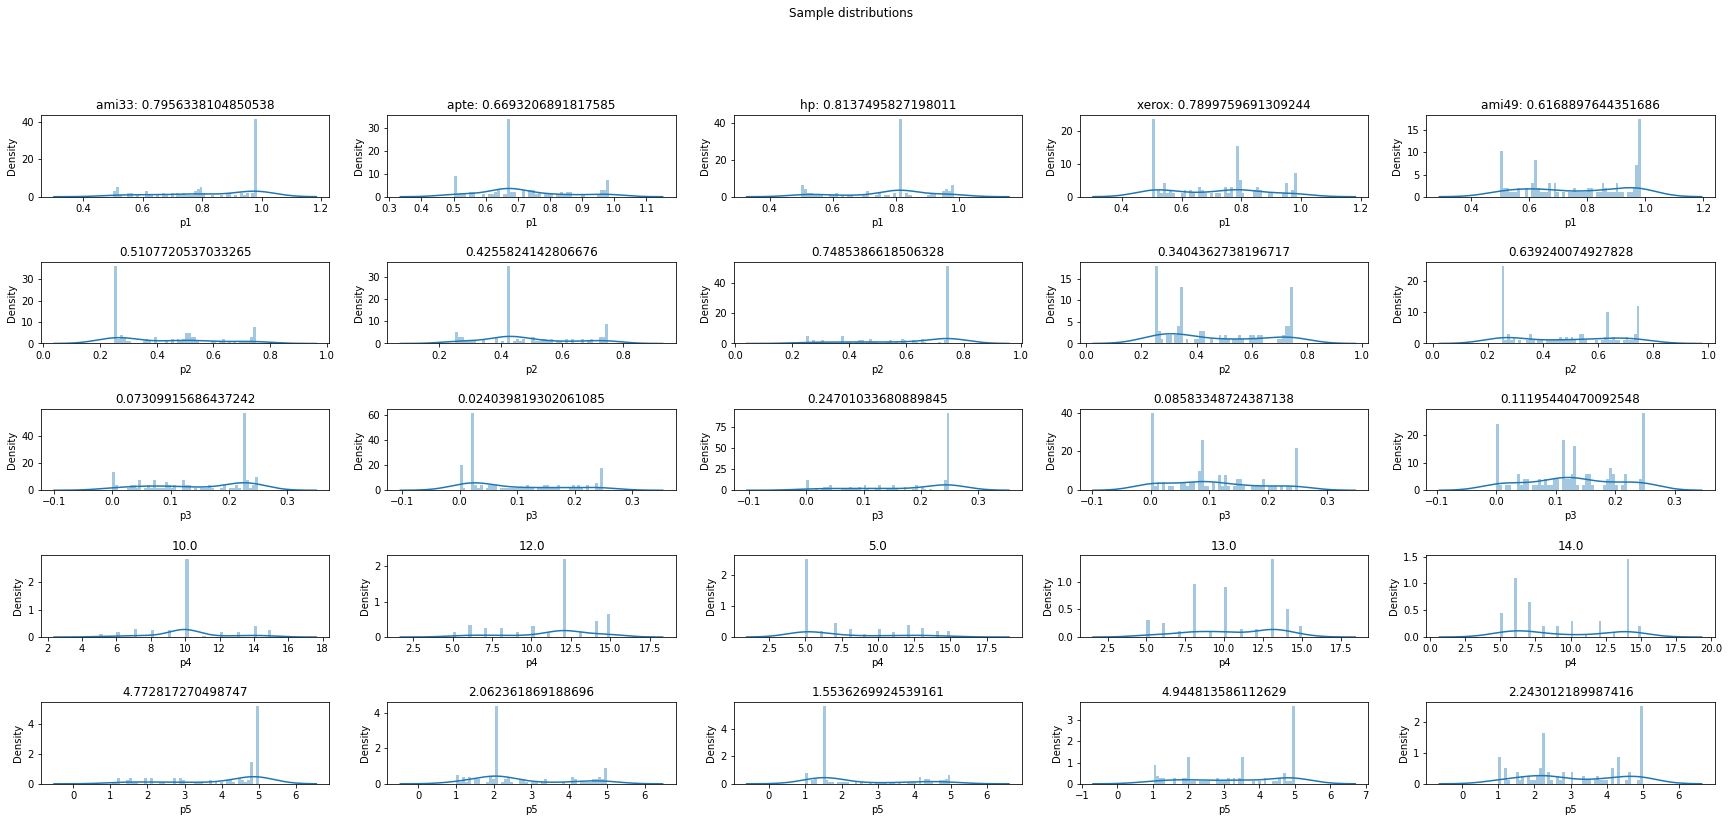

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig = plt.figure(figsize=(30, 15))
fig.suptitle('Cost plots')
nb = 50
## p1 = P
## p2 = alpha
## p3 = beta
## p4 = k
## p5 = rnds
## p6 = c
fig.suptitle('Sample distributions')
a=fig.add_subplot(6,5,1)
surf1 = sns.distplot(ami33['p1'],bins=nb)
a.set_title('ami33: {}'.format(ami33min['p1']))
a=fig.add_subplot(6,5,2)
surf1 = sns.distplot(apte['p1'],bins=nb)
a.set_title('apte: {}'.format(aptemin['p1']))
a=fig.add_subplot(6,5,3)
surf1 = sns.distplot(hp['p1'],bins=nb)
a.set_title('hp: {}'.format(hpmin['p1']))
a=fig.add_subplot(6,5,4)
surf1 = sns.distplot(xerox['p1'],bins=nb)
a.set_title('xerox: {}'.format(xeroxmin['p1']))
a=fig.add_subplot(6,5,5)
surf1 = sns.distplot(ami49['p1'],bins=nb)
a.set_title('ami49: {}'.format(ami49min['p1']))

a=fig.add_subplot(6,5,6)
surf1 = sns.distplot(ami33['p2'],bins=nb)
a.set_title('{}'.format(ami33min['p2']))
a=fig.add_subplot(6,5,7)
surf1 = sns.distplot(apte['p2'],bins=nb)
a.set_title('{}'.format(aptemin['p2']))
a=fig.add_subplot(6,5,8)
surf1 = sns.distplot(hp['p2'],bins=nb)
a.set_title('{}'.format(hpmin['p2']))
a=fig.add_subplot(6,5,9)
surf1 = sns.distplot(xerox['p2'],bins=nb)
a.set_title('{}'.format(xeroxmin['p2']))
a=fig.add_subplot(6,5,10)
surf1 = sns.distplot(ami49['p2'],bins=nb)
a.set_title('{}'.format(ami49min['p2']))

a=fig.add_subplot(6,5,11)
surf1 = sns.distplot(ami33['p3'],bins=nb)
a.set_title('{}'.format(ami33min['p3']))

a=fig.add_subplot(6,5,12)
surf1 = sns.distplot(apte['p3'],bins=nb)
a.set_title('{}'.format(aptemin['p3']))
a=fig.add_subplot(6,5,13)
surf1 = sns.distplot(hp['p3'],bins=nb)
a.set_title('{}'.format(hpmin['p3']))
a=fig.add_subplot(6,5,14)
surf1 = sns.distplot(xerox['p3'],bins=nb)
a.set_title('{}'.format(xeroxmin['p3']))
a=fig.add_subplot(6,5,15)
surf1 = sns.distplot(ami49['p3'],bins=nb)
a.set_title('{}'.format(ami49min['p3']))

a=fig.add_subplot(6,5,16)
surf1 = sns.distplot(ami33['p4'],bins=nb)
a.set_title('{}'.format(ami33min['p4']))
a=fig.add_subplot(6,5,17)
surf1 = sns.distplot(apte['p4'],bins=nb)
a.set_title('{}'.format(aptemin['p4']))
a=fig.add_subplot(6,5,18)
surf1 = sns.distplot(hp['p4'],bins=nb)
a.set_title('{}'.format(hpmin['p4']))
a=fig.add_subplot(6,5,19)
surf1 = sns.distplot(xerox['p4'],bins=nb)
a.set_title('{}'.format(xeroxmin['p4']))
a=fig.add_subplot(6,5,20)
surf1 = sns.distplot(ami49['p4'],bins=nb)
a.set_title('{}'.format(ami49min['p4']))

a=fig.add_subplot(6,5,21)
surf1 = sns.distplot(ami33['p5'],bins=nb)
a.set_title('{}'.format(ami33min['p5']))
a=fig.add_subplot(6,5,22)
surf1 = sns.distplot(apte['p5'],bins=nb)
a.set_title('{}'.format(aptemin['p5']))
a=fig.add_subplot(6,5,23)
surf1 = sns.distplot(hp['p5'],bins=nb)
a.set_title('{}'.format(hpmin['p5']))
a=fig.add_subplot(6,5,24)
surf1 = sns.distplot(xerox['p5'],bins=nb)
a.set_title('{}'.format(xeroxmin['p5']))
a=fig.add_subplot(6,5,25)
surf1 = sns.distplot(ami49['p5'],bins=nb)
a.set_title('{}'.format(ami49min['p5']))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None,hspace=0.8)
plt.show()

In [27]:
xcoef = []
for p in xerox:
    if p == 'cost' or p == 'hpwl':
        continue
    coeff = np.corrcoef(xerox[p].to_numpy(), xerox['hpwl'].to_numpy())[0,1]
    xcoef.append(coeff)
xcoef=np.array(xcoef)

amicoef = []
for p in ami33:
    if p == 'cost' or p == 'hpwl':
        continue
    coeff = np.corrcoef(ami33[p].to_numpy(), ami33['hpwl'].to_numpy())[0,1]
    amicoef.append(coeff)
amicoef = np.array(amicoef)

aptecoef = []
for p in apte:
    if p == 'cost' or p == 'hpwl':
        continue
    coeff = np.corrcoef(apte[p].to_numpy(), apte['hpwl'].to_numpy())[0,1]
    aptecoef.append(coeff)
aptecoef = np.array(aptecoef)

hpcoef = []
for p in hp:
    if p == 'cost' or p == 'hpwl':
        continue
    coeff = np.corrcoef(hp[p].to_numpy(), hp['hpwl'].to_numpy())[0,1]
    hpcoef.append(coeff)
hpcoef = np.array(hpcoef)

ami49coef = []
for p in ami49:
    if p == 'cost' or p == 'hpwl':
        continue
    coeff = np.corrcoef(ami49[p].to_numpy(), ami49['hpwl'].to_numpy())[0,1]
    ami49coef.append(coeff)
ami49coef = np.array(ami49coef)

coeffs = np.stack([xcoef, amicoef, aptecoef, hpcoef, ami49coef])

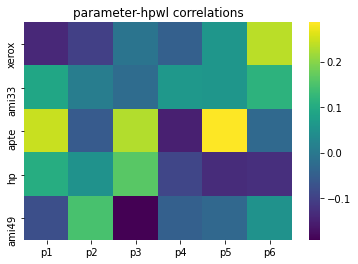

In [28]:
ax = plt.axes()
sns.heatmap(coeffs,cmap='viridis',xticklabels=['p1','p2','p3','p4','p5', 'p6'],yticklabels=['xerox', 'ami33', 'apte', 'hp', 'ami49'],ax=ax)
ax.set_title('parameter-hpwl correlations')
plt.show()